## Imports

In [3]:
import pandas as pd
import requests
import os
import datetime
import gzip
import shutil
import numpy as np


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from scipy.stats import t, shapiro
#from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels

# GESTION DES DOSSIERS

## Creation du dossier raw contenant les données brutes

In [5]:
#Création du dossier raw pour les donnée brutes
path2021= (r"/home/lenobian/Formation/P7/TP/data")
os.makedirs(path2021, exist_ok=True)

# DOWNLOAD STEPS

## Téléchargement du fichier compressé (gz)

In [6]:
##### Déclaration de l'url pour 2021
url2021="https://files.data.gouv.fr/geo-dvf/latest/csv/2021/departements/"

while True:
    url_test2021 = requests.get(url2021+"/44.csv.gz", stream=True)
    if url_test2021.status_code==200:  #test reponse du serveur
        print("Téléchargement en cours.")
        with requests.get(url2021+"/44.csv.gz", stream=True) as r:
            with open(path2021+"/44.csv.gz", "wb") as f:
                shutil.copyfileobj(r.raw, f) #Enregistrement du fichier (méthode + rapide)
        print("Téléchargement terminé.")
        break
#Décompression du fichier et gestion d'erreur
while True:
    try:
        print("Décompression du fichier.")
        with gzip.open(path2021+"/44.csv.gz", 'rb') as f_in:
            with open(path2021+"/44.csv", 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
        print("Décompression terminée.")
        break
    except:
        print("Erreur lors de la décompression.")
        print("Le fichier est peut être manquent ou corrompus.")
        print("Contactez le noob de la maintenance!")
        break
        


Téléchargement en cours.
Téléchargement terminé.
Décompression du fichier.
Décompression terminée.


In [7]:
#Création du df
df2021=pd.read_csv(path2021+"/44.csv")


/tmp/ipykernel_8382/4271343537.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df2021=pd.read_csv(path2021+"/44.csv")


# TRANSFORM STEP

## Général

In [8]:
df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103235 entries, 0 to 103234
Data columns (total 40 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id_mutation                   103235 non-null  object 
 1   date_mutation                 103235 non-null  object 
 2   numero_disposition            103235 non-null  int64  
 3   nature_mutation               103235 non-null  object 
 4   valeur_fonciere               102496 non-null  float64
 5   adresse_numero                68126 non-null   float64
 6   adresse_suffixe               4434 non-null    object 
 7   adresse_nom_voie              101810 non-null  object 
 8   adresse_code_voie             101817 non-null  object 
 9   code_postal                   101811 non-null  float64
 10  code_commune                  103235 non-null  int64  
 11  nom_commune                   103235 non-null  object 
 12  code_departement              103235 non-nul

In [9]:
df2021['code_commune'].head(15)

0     44109
1     44109
2     44109
3     44109
4     44109
5     44162
6     44109
7     44109
8     44109
9     44109
10    44109
11    44109
12    44109
13    44190
14    44109
Name: code_commune, dtype: int64

## Drop "Dépendences"

In [10]:
df2021.drop(df2021[df2021['type_local'] == 'Dépendance'].index, inplace = True)

In [11]:
df2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81531 entries, 1 to 103234
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_mutation                   81531 non-null  object 
 1   date_mutation                 81531 non-null  object 
 2   numero_disposition            81531 non-null  int64  
 3   nature_mutation               81531 non-null  object 
 4   valeur_fonciere               80810 non-null  float64
 5   adresse_numero                46510 non-null  float64
 6   adresse_suffixe               3281 non-null   object 
 7   adresse_nom_voie              80106 non-null  object 
 8   adresse_code_voie             80113 non-null  object 
 9   code_postal                   80107 non-null  float64
 10  code_commune                  81531 non-null  int64  
 11  nom_commune                   81531 non-null  object 
 12  code_departement              81531 non-null  int64  
 13  

## Valeur_fonciere

In [12]:
#Drop des lignes valeur_foncière nulles
df2021.dropna(subset=['valeur_fonciere'], inplace=True)

In [13]:
df2021['valeur_fonciere']=df2021['valeur_fonciere'][df2021['valeur_fonciere'].notnull()].astype(int)

## Adresse

In [14]:
#Format adresse_nom_voie
df2021['adresse_nom_voie']=df2021['adresse_nom_voie'].str.title()

In [15]:
df2021.nombre_pieces_principales[df2021.nombre_pieces_principales.notnull()].astype(int)
df2021.surface_reelle_bati[df2021.surface_reelle_bati.notnull()].astype(int)
df2021.code_postal[df2021.code_postal.notnull()].astype(int)
df2021.code_type_local[df2021.code_type_local.notnull()].astype(int)
df2021.code_postal[df2021.code_postal.notnull()].astype(int)
df2021.code_commune[df2021.code_commune.notnull()].astype(int)
df2021.lot1_surface_carrez[df2021.lot1_surface_carrez.notnull()].astype(int)
df2021.lot2_surface_carrez[df2021.lot2_surface_carrez.notnull()].astype(int)
df2021.lot3_surface_carrez[df2021.lot3_surface_carrez.notnull()].astype(int)
df2021.lot4_surface_carrez[df2021.lot4_surface_carrez.notnull()].astype(int)
df2021.lot5_surface_carrez[df2021.lot5_surface_carrez.notnull()].astype(int)
df2021.surface_terrain[df2021.surface_terrain.notnull()].astype(int)
df2021.longitude[df2021.longitude.notnull()].astype(int)
df2021.latitude[df2021.latitude.notnull()].astype(int)

1         47
2         47
3         47
5         47
7         47
          ..
103230    47
103231    47
103232    47
103233    47
103234    47
Name: latitude, Length: 79717, dtype: int64

## Ajout colonne somme surface carrez

In [16]:
df2021["SomCarrez"]=df2021.fillna(0)['lot1_surface_carrez'] + df2021.fillna(0)['lot2_surface_carrez'] + df2021.fillna(0)['lot3_surface_carrez'] + df2021.fillna(0)['lot4_surface_carrez'] + df2021.fillna(0)['lot5_surface_carrez']

In [17]:
print(df2021.iloc[0:5, [1, 19, 21, 23, 25, 27, 30, 31]])

  date_mutation  lot1_surface_carrez  lot2_surface_carrez  \
1    2021-01-05                  NaN                29.19   
2    2021-01-04                  NaN                  NaN   
3    2021-01-05                74.38                  NaN   
5    2021-01-07                  NaN                  NaN   
7    2021-01-04                36.02                  NaN   

   lot3_surface_carrez  lot4_surface_carrez  lot5_surface_carrez   type_local  \
1                  NaN                  NaN                  NaN  Appartement   
2                  NaN                  NaN                  NaN       Maison   
3                  NaN                  NaN                  NaN  Appartement   
5                  NaN                  NaN                  NaN       Maison   
7                  NaN                  NaN                  NaN  Appartement   

   surface_reelle_bati  
1                 45.0  
2                134.0  
3                 74.0  
5                129.0  
7                 36.

In [18]:
df2021['SomCarrez']

1         29.19
2          0.00
3         74.38
5          0.00
7         36.02
          ...  
103230     0.00
103231     0.00
103232     0.00
103233     0.00
103234     0.00
Name: SomCarrez, Length: 80810, dtype: float64

# REGRESSION LINEAIRE SIMPLE 

## Test valeur/SUM(carrez1/2/3/4/5)

In [19]:
#filter : appt, 0<Som_carrez<200, cp=44000, vf<1250000 
filter=(df2021['type_local']=='Appartement') & ((df2021['SomCarrez']> 0)&(df2021['SomCarrez']<200) ) & (df2021['code_postal']==44000) & (df2021['valeur_fonciere']<1250000)

In [20]:
df_test=df2021[filter].copy()
df_test

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,SomCarrez
3,2021-513942,2021-01-05,1,Vente,354240,48.0,B,Rue De Coulmiers,2244,44000.0,...,74.0,3.0,NaN,NaN,NaN,NaN,NaN,-1.536938,47.222669,74.38
9,2021-513947,2021-01-08,1,Vente,240000,11.0,NaN,Rue Francis Merlant,3288,44000.0,...,48.0,2.0,NaN,NaN,NaN,NaN,NaN,-1.575123,47.221564,49.81
12,2021-513948,2021-01-05,1,Vente,340650,162.0,NaN,Rue Paul Bellamy,6200,44000.0,...,70.0,4.0,NaN,NaN,NaN,NaN,NaN,-1.562694,47.230031,86.96
17,2021-513952,2021-01-11,1,Vente,95000,60.0,NaN,Bd Ernest Dalby,2880,44000.0,...,32.0,2.0,NaN,NaN,NaN,NaN,NaN,-1.530061,47.224697,34.07
18,2021-513953,2021-01-07,1,Vente,280000,6.0,NaN,Pl Viarme,8404,44000.0,...,59.0,3.0,NaN,NaN,NaN,NaN,NaN,-1.561568,47.220462,58.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61204,2021-540324,2021-12-23,1,Vente,135000,5.0,NaN,Sq St Pasquier,7716,44000.0,...,39.0,2.0,NaN,NaN,NaN,NaN,NaN,-1.567464,47.227559,39.28
61253,2021-540353,2021-12-30,1,Vente,315000,24.0,NaN,Rue Pitre Chevalier,6668,44000.0,...,67.0,3.0,NaN,NaN,NaN,NaN,NaN,-1.551243,47.223746,66.57
61323,2021-540391,2021-12-28,1,Vente,297300,3.0,NaN,Pl Viarme,8404,44000.0,...,59.0,3.0,NaN,NaN,NaN,NaN,NaN,-1.561568,47.220462,59.27
61409,2021-540431,2021-12-30,1,Vente,195000,5.0,NaN,Imp Vignolle,8496,44000.0,...,43.0,2.0,NaN,NaN,NaN,NaN,NaN,-1.550084,47.221216,43.23


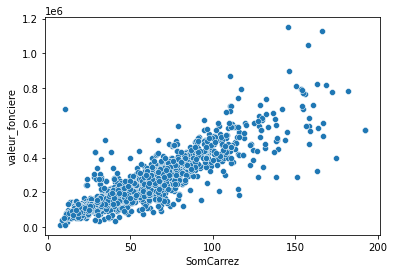

In [21]:
ax = sns.scatterplot(x="SomCarrez", y="valeur_fonciere", data=df_test)
ax.set(xlabel='SomCarrez', ylabel='valeur_fonciere')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

In [22]:
#reg simple
reg_simp = smf.ols('valeur_fonciere ~ SomCarrez', data=df_test).fit()
print(reg_simp.summary())

                            OLS Regression Results                            
Dep. Variable:        valeur_fonciere   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     5542.
Date:                Tue, 26 Jul 2022   Prob (F-statistic):               0.00
Time:                        11:57:31   Log-Likelihood:                -21316.
No. Observations:                1697   AIC:                         4.264e+04
Df Residuals:                    1695   BIC:                         4.265e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.435e+04   3455.188      4.153      0.0

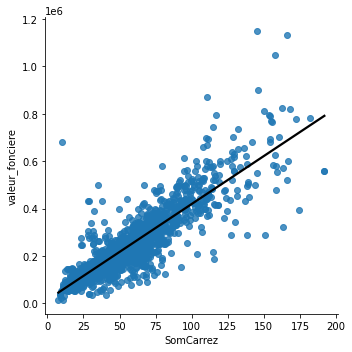

In [23]:
ax = sns.lmplot(x="SomCarrez", y="valeur_fonciere", data=df_test, ci=None, line_kws={'color':'black'})
ax.set(xlabel='SomCarrez', ylabel='valeur_fonciere')
plt.show()

In [24]:
#residus
df_test['residu_s'] = reg_simp.resid

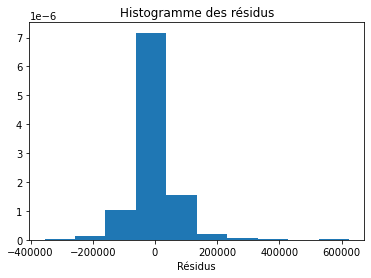

In [25]:
plt.hist(df_test['residu_s'],bins=10, density=True)
plt.xlabel('Résidus')
plt.title('Histogramme des résidus')
plt.show()

In [26]:
a_prevoir = pd.DataFrame({'SomCarrez':[40]})
vf_prev = reg_simp.predict(a_prevoir)
print(round(vf_prev[0], 2))

176297.75


In [27]:
vf_pred = reg_simp.predict(df_test.SomCarrez)
vf_pred 

3        315493.121059
9        216015.797970
12       366426.158278
17       152288.770480
18       250268.063063
             ...      
61204    173382.659503
61253    283872.531180
61323    254316.794161
61409    189375.147342
61440    211764.630317
Length: 1697, dtype: float64

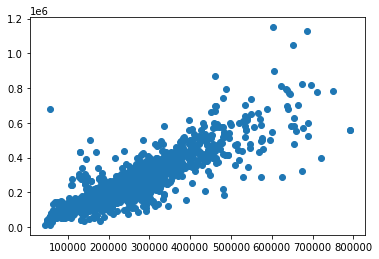

In [28]:
plt.scatter(vf_pred,df_test.valeur_fonciere)

### recherche erreur et explication

In [29]:
abs(vf_pred - df_test.valeur_fonciere).sort_values(ascending= False)

2969     623544.694621
13625    546277.712041
28291    444521.648388
4191     409116.945195
20067    397935.862725
             ...      
37237       100.992434
44253        93.311272
48069        79.468432
4874         51.082898
19759        20.103686
Length: 1697, dtype: float64

In [30]:
df_test.loc[13625,:]

id_mutation                        2021-520489
date_mutation                       2021-04-15
numero_disposition                           1
nature_mutation                          Vente
valeur_fonciere                        1150000
adresse_numero                            18.0
adresse_suffixe                            NaN
adresse_nom_voie                Rue La Fayette
adresse_code_voie                         4748
code_postal                            44000.0
code_commune                             44109
nom_commune                             Nantes
code_departement                            44
ancien_code_commune                        NaN
ancien_nom_commune                         NaN
id_parcelle                     44109000HR0016
ancien_id_parcelle                         NaN
numero_volume                              NaN
lot1_numero                              104.0
lot1_surface_carrez                        NaN
lot2_numero                              206.0
lot2_surface_

# REGRESSION LINEAIRE MULTIPLE (mm df_test)

In [31]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1697 entries, 3 to 61440
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_mutation                   1697 non-null   object 
 1   date_mutation                 1697 non-null   object 
 2   numero_disposition            1697 non-null   int64  
 3   nature_mutation               1697 non-null   object 
 4   valeur_fonciere               1697 non-null   int64  
 5   adresse_numero                1697 non-null   float64
 6   adresse_suffixe               66 non-null     object 
 7   adresse_nom_voie              1697 non-null   object 
 8   adresse_code_voie             1697 non-null   object 
 9   code_postal                   1697 non-null   float64
 10  code_commune                  1697 non-null   int64  
 11  nom_commune                   1697 non-null   object 
 12  code_departement              1697 non-null   int64  
 13  an

In [32]:
reg_multi = smf.ols('valeur_fonciere~ SomCarrez+ surface_reelle_bati+nombre_pieces_principales+longitude+ latitude', data=df_test).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:        valeur_fonciere   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     1205.
Date:                Tue, 26 Jul 2022   Prob (F-statistic):               0.00
Time:                        11:57:32   Log-Likelihood:                -21246.
No. Observations:                1696   AIC:                         4.250e+04
Df Residuals:                    1690   BIC:                         4.254e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [33]:
#Suppression nombre_pièces_principales inutile
reg_multi = smf.ols('valeur_fonciere~ SomCarrez+ surface_reelle_bati+longitude+ latitude', data=df_test).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:        valeur_fonciere   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     1508.
Date:                Tue, 26 Jul 2022   Prob (F-statistic):               0.00
Time:                        11:57:32   Log-Likelihood:                -21246.
No. Observations:                1696   AIC:                         4.250e+04
Df Residuals:                    1691   BIC:                         4.253e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            5.453e+07   1

In [34]:
import sklearn
from sklearn.model_selection import train_test_split

In [35]:
#Division df train/test
y = df_test.valeur_fonciere
X = df_test [[  
    'SomCarrez',
    'surface_reelle_bati']]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [36]:
train = X_train

train["valeur_fonciere"] = y_train

In [37]:
reg_multi = smf.ols('valeur_fonciere~SomCarrez+surface_reelle_bati', data = train).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:        valeur_fonciere   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     1921.
Date:                Tue, 26 Jul 2022   Prob (F-statistic):               0.00
Time:                        11:57:32   Log-Likelihood:                -14244.
No. Observations:                1136   AIC:                         2.849e+04
Df Residuals:                    1133   BIC:                         2.851e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.151e+04   4

In [38]:
y_pred = reg_multi.predict(X_test)

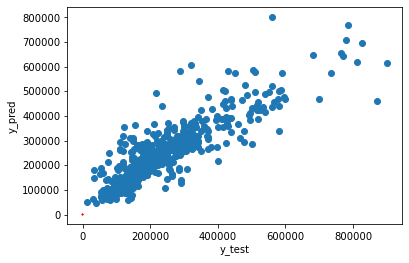

In [39]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test') 
plt.ylabel('y_pred') 
plt.plot([50, 165], [50, 165], 'r-', lw=2)

In [40]:
from sklearn.metrics import r2_score

r2_pred = r2_score(y_test,y_pred)
r2_pred

0.7636941358628279

# df_appartement

In [41]:
filter=(df2021['type_local']=='Appartement') & ((df2021['SomCarrez']> 0)&(df2021['SomCarrez']<1000))

In [42]:
df_appartement=df2021[filter]

In [43]:
df_appartement.dropna(subset=['latitude', 'longitude', 'SomCarrez'], inplace=True)

/tmp/ipykernel_8382/3894082951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_appartement.dropna(subset=['latitude', 'longitude', 'SomCarrez'], inplace=True)


In [44]:
df_appartement

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,SomCarrez
1,2021-513940,2021-01-05,1,Vente,130000,10.0,NaN,Rue Richer,7308,44100.0,...,45.0,1.0,NaN,NaN,NaN,NaN,NaN,-1.576574,47.212731,29.19
3,2021-513942,2021-01-05,1,Vente,354240,48.0,B,Rue De Coulmiers,2244,44000.0,...,74.0,3.0,NaN,NaN,NaN,NaN,NaN,-1.536938,47.222669,74.38
7,2021-513945,2021-01-04,1,Vente,133000,19.0,B,Rue Leon Jost,4912,44300.0,...,36.0,2.0,NaN,NaN,NaN,NaN,NaN,-1.565577,47.237053,36.02
9,2021-513947,2021-01-08,1,Vente,240000,11.0,NaN,Rue Francis Merlant,3288,44000.0,...,48.0,2.0,NaN,NaN,NaN,NaN,NaN,-1.575123,47.221564,49.81
12,2021-513948,2021-01-05,1,Vente,340650,162.0,NaN,Rue Paul Bellamy,6200,44000.0,...,70.0,4.0,NaN,NaN,NaN,NaN,NaN,-1.562694,47.230031,86.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102520,2021-557811,2021-02-26,1,Vente,115000,3.0,NaN,Rue Maurice Utrillo,0955,44110.0,...,66.0,3.0,NaN,NaN,NaN,NaN,NaN,-1.377827,47.728697,66.90
102652,2021-557872,2021-03-10,1,Vente,118000,19.0,B,Rue Du Pelican,1110,44110.0,...,72.0,4.0,NaN,NaN,NaN,NaN,NaN,-1.375440,47.718593,72.44
102813,2021-557938,2021-03-11,1,Vente,54970,31.0,NaN,Rue Des Vingt Sept Otages,1600,44110.0,...,27.0,2.0,NaN,NaN,NaN,NaN,NaN,-1.366519,47.719067,27.61
102873,2021-557972,2021-03-24,1,Vente,50000,5.0,NaN,Rue Des Quatre Oeufs,1230,44110.0,...,42.0,1.0,NaN,NaN,NaN,NaN,NaN,-1.376418,47.719000,39.02


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

a=df_appartement.loc[:, 'latitude']
b=df_appartement.loc[:, 'longitude']
c=df_appartement.loc[:, 'SomCarrez']
x=list(zip(a, b, c))
y=df_appartement.loc[:, 'valeur_fonciere']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
knnr=KNeighborsRegressor(n_neighbors=3, metric='euclidean')
knnr.fit(x_train, y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=3)

In [46]:
prediction=knnr.predict([[-1.377827, 47.718593, 70]])

In [47]:
print(prediction)

[153333.33333333]


# df_maison

In [48]:
df2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80810 entries, 1 to 103234
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_mutation                   80810 non-null  object 
 1   date_mutation                 80810 non-null  object 
 2   numero_disposition            80810 non-null  int64  
 3   nature_mutation               80810 non-null  object 
 4   valeur_fonciere               80810 non-null  int64  
 5   adresse_numero                46364 non-null  float64
 6   adresse_suffixe               3265 non-null   object 
 7   adresse_nom_voie              79385 non-null  object 
 8   adresse_code_voie             79392 non-null  object 
 9   code_postal                   79386 non-null  float64
 10  code_commune                  80810 non-null  int64  
 11  nom_commune                   80810 non-null  object 
 12  code_departement              80810 non-null  int64  
 13  

In [49]:
filter=(df2021['type_local']=='Maison') & ((df2021['surface_reelle_bati']> 0)&(df2021['surface_reelle_bati']<500)) & ((df2021['surface_terrain']>0) & df2021['surface_terrain']<2000)

In [50]:
df_maison=df2021[filter]

In [51]:
df_maison.dropna(subset=['latitude', 'longitude', 'surface_reelle_bati', 'surface_terrain', 'valeur_fonciere'], inplace=True)

/tmp/ipykernel_8382/715909382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maison.dropna(subset=['latitude', 'longitude', 'surface_reelle_bati', 'surface_terrain', 'valeur_fonciere'], inplace=True)


In [56]:
#from sklearn.preprocessing import scale
#df_scaled=df_maison[['latitude', 'longitude', 'surface_reelle_bati', 'surface_terrain', 'valeur_fonciere']]
#for column in df_scaled[.columns:
#    df_scaled['column']=scale(df_scaled['column'])


#normalisation des données numériques maison :
colonnes = ['valeur_fonciere', 'surface_terrain' , 'surface_reelle_bati']
df_scaled = df_maison.copy()

for column in df_scaled[colonnes].columns :
    df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()

display(df_scaled)

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,SomCarrez
2,2021-513941,2021-01-04,1,Vente,0.055732,3.0,NaN,Rue Des Martyrs,5444,44100.0,...,0.291304,5.0,S,sols,NaN,NaN,0.001842,-1.575733,47.216779,0.0
5,2021-513944,2021-01-07,1,Vente,0.027070,4.0,NaN,Imp Marguerite Duras,1599,44800.0,...,0.280435,5.0,S,sols,NaN,NaN,0.003685,-1.634305,47.219005,0.0
8,2021-513946,2021-01-07,1,Vente,0.010350,28.0,NaN,Imp Jean Marie Mustiere,4490,44300.0,...,0.086957,2.0,S,sols,NaN,NaN,0.001143,-1.544823,47.235499,0.0
13,2021-513949,2021-01-07,1,Vente,0.029936,12.0,NaN,Rue De La Savariere,1240,44230.0,...,0.095652,3.0,S,sols,NaN,NaN,0.006623,-1.492742,47.209036,0.0
41,2021-513965,2021-01-06,1,Vente,0.044586,18.0,T,Rue De La Beraudiere,0752,44000.0,...,0.193478,5.0,S,sols,NaN,NaN,0.002041,-1.547943,47.227025,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103227,2021-558117,2021-04-01,1,Vente,0.022691,9.0,NaN,Licouet,B345,44170.0,...,0.371739,4.0,J,jardins,NaN,NaN,0.007719,-1.657582,47.519262,0.0
103230,2021-558119,2021-04-10,1,Vente,0.006369,24.0,NaN,La Sauzaie,C286,44590.0,...,0.169565,2.0,T,terres,NaN,NaN,0.018415,-1.578841,47.646372,0.0
103231,2021-558119,2021-04-10,1,Vente,0.006369,24.0,NaN,La Sauzaie,C286,44590.0,...,0.169565,2.0,S,sols,NaN,NaN,0.004724,-1.578841,47.646372,0.0
103233,2021-558121,2021-04-26,1,Vente,0.036624,123.0,NaN,Rue Saint Georges,0740,44390.0,...,0.286957,3.0,S,sols,NaN,NaN,0.004724,-1.486872,47.441095,0.0


In [57]:
df_scaled

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,SomCarrez
2,2021-513941,2021-01-04,1,Vente,0.055732,3.0,NaN,Rue Des Martyrs,5444,44100.0,...,0.291304,5.0,S,sols,NaN,NaN,0.001842,-1.575733,47.216779,0.0
5,2021-513944,2021-01-07,1,Vente,0.027070,4.0,NaN,Imp Marguerite Duras,1599,44800.0,...,0.280435,5.0,S,sols,NaN,NaN,0.003685,-1.634305,47.219005,0.0
8,2021-513946,2021-01-07,1,Vente,0.010350,28.0,NaN,Imp Jean Marie Mustiere,4490,44300.0,...,0.086957,2.0,S,sols,NaN,NaN,0.001143,-1.544823,47.235499,0.0
13,2021-513949,2021-01-07,1,Vente,0.029936,12.0,NaN,Rue De La Savariere,1240,44230.0,...,0.095652,3.0,S,sols,NaN,NaN,0.006623,-1.492742,47.209036,0.0
41,2021-513965,2021-01-06,1,Vente,0.044586,18.0,T,Rue De La Beraudiere,0752,44000.0,...,0.193478,5.0,S,sols,NaN,NaN,0.002041,-1.547943,47.227025,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103227,2021-558117,2021-04-01,1,Vente,0.022691,9.0,NaN,Licouet,B345,44170.0,...,0.371739,4.0,J,jardins,NaN,NaN,0.007719,-1.657582,47.519262,0.0
103230,2021-558119,2021-04-10,1,Vente,0.006369,24.0,NaN,La Sauzaie,C286,44590.0,...,0.169565,2.0,T,terres,NaN,NaN,0.018415,-1.578841,47.646372,0.0
103231,2021-558119,2021-04-10,1,Vente,0.006369,24.0,NaN,La Sauzaie,C286,44590.0,...,0.169565,2.0,S,sols,NaN,NaN,0.004724,-1.578841,47.646372,0.0
103233,2021-558121,2021-04-26,1,Vente,0.036624,123.0,NaN,Rue Saint Georges,0740,44390.0,...,0.286957,3.0,S,sols,NaN,NaN,0.004724,-1.486872,47.441095,0.0


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

a=df_scaled.loc[:, 'latitude']
b=df_scaled.loc[:, 'longitude']
c=df_scaled.loc[:, 'surface_reelle_bati']
d=df_scaled.loc[:, 'surface_terrain']
x=list(zip(a, b, c, d))
y=df_scaled.loc[:, 'valeur_fonciere']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
knnr=KNeighborsRegressor(n_neighbors=1, metric='euclidean')
knnr.fit(x_train, y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=1)

In [59]:
y_pred=knnr.predict(x_test)

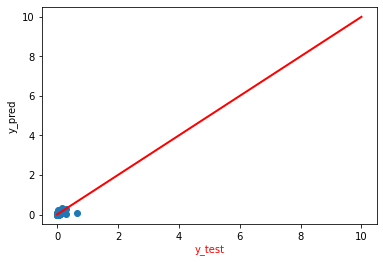

In [60]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test', c="red") 
plt.ylabel('y_pred') 
plt.plot([0, 10], [0, 10], 'r-', lw=2)

In [61]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.35489549164735956